<a href="https://colab.research.google.com/github/Kiro-tagama/DIO-BairesDev-Machine-Learning-Practitioner/blob/main/reducao_de_dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O dogs.jpg https://p2.trrsf.com/image/fget/cf/774/0/images.terra.com/2024/10/28/1717565085-filhotes-golden-retriever.jpg

--2024-11-26 18:01:39--  https://p2.trrsf.com/image/fget/cf/774/0/images.terra.com/2024/10/28/1717565085-filhotes-golden-retriever.jpg
Resolving p2.trrsf.com (p2.trrsf.com)... 23.54.127.12, 23.54.127.6, 2600:1408:9000::172d:b5a3, ...
Connecting to p2.trrsf.com (p2.trrsf.com)|23.54.127.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34300 (33K) [image/jpeg]
Saving to: ‘dogs.jpg’

dogs.jpg            100%[===================>]  33.50K  --.-KB/s    in 0.02s   

2024-11-26 18:01:39 (1.94 MB/s) - ‘dogs.jpg’ saved [34300/34300]



In [3]:
from PIL import Image

caminho_imagem = "dogs.jpg"
imagem_original = Image.open(caminho_imagem)

In [4]:
def converter_para_cinza(imagem):
  largura, altura = imagem.size
  imagem_cinza = Image.new("L", (largura, altura))  # Escala de cinza

  for y in range(altura):
      for x in range(largura):
          r, g, b = imagem.getpixel((x, y))
          valor_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
          imagem_cinza.putpixel((x, y), valor_cinza)

  return imagem_cinza

In [5]:
def binarizar_imagem(imagem_cinza, limiar=127):
  largura, altura = imagem_cinza.size
  imagem_binaria = Image.new("1", (largura, altura))  # Binária

  for y in range(altura):
      for x in range(largura):
          valor_cinza = imagem_cinza.getpixel((x, y))
          valor_binario = 1 if valor_cinza > limiar else 0
          imagem_binaria.putpixel((x, y), valor_binario)

  return imagem_binaria

Imagem Original:


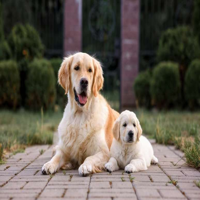

Imagem em Tons de Cinza:


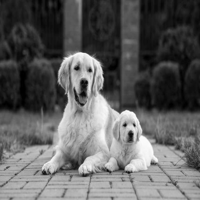

Imagem Binarizada:


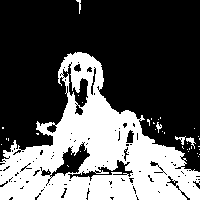

In [14]:
from IPython.display import display
from PIL import Image
import numpy as np

imagem_cinza = converter_para_cinza(imagem_original)
imagem_binaria = binarizar_imagem(imagem_cinza)

def exibir_imagem(imagem):
  size_img = 200
  return display(imagem.resize((size_img,size_img)))

print("Imagem Original:")
exibir_imagem(imagem_original)

print("Imagem em Tons de Cinza:")
exibir_imagem(imagem_cinza)

print("Imagem Binarizada:")
exibir_imagem(imagem_binaria)

In [16]:
print("Imagem Original:")
print(np.array(imagem_original))

print("\n\nImagem em Tons de Cinza:")
print(np.array(imagem_cinza))

print("\n\nImagem Binarizada:")
print(np.array(imagem_binaria))

Imagem Original:
[[[ 22  28  16]
  [ 20  26  14]
  [ 17  23  11]
  ...
  [ 20  28   7]
  [ 19  27   6]
  [ 20  28   7]]

 [[ 23  29  17]
  [ 20  26  14]
  [ 17  23  11]
  ...
  [ 21  29   8]
  [ 20  28   7]
  [ 20  28   7]]

 [[ 23  29  15]
  [ 21  27  13]
  [ 17  23  11]
  ...
  [ 21  29   8]
  [ 20  28   7]
  [ 21  29   8]]

 ...

 [[167 149 149]
  [168 150 150]
  [171 153 153]
  ...
  [158 136 138]
  [157 135 137]
  [157 135 137]]

 [[173 155 155]
  [174 156 156]
  [177 159 159]
  ...
  [165 143 145]
  [163 141 143]
  [163 141 143]]

 [[176 158 158]
  [177 159 159]
  [180 162 162]
  ...
  [169 147 149]
  [167 145 147]
  [166 144 146]]]


Imagem em Tons de Cinza:
[[ 24  22  19 ...  23  22  23]
 [ 25  22  19 ...  24  23  23]
 [ 25  23  19 ...  24  23  24]
 ...
 [154 155 158 ... 142 141 141]
 [160 161 164 ... 149 147 147]
 [163 164 167 ... 153 151 150]]


Imagem Binarizada:
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... Fal